In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

In [18]:
df = pd.read_csv('Exam_Industry.csv',index_col=0,parse_dates=True)
mk = pd.read_csv('Exam_Market.csv',index_col=0,parse_dates=True)

In [19]:
mk.mean()

Mkt    1.240104
dtype: float64

In [20]:
stock_names = df.columns 
stock_names

Index(['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other'], dtype='object')

In [21]:
df  = df.apply(lambda x: x-mk['Mkt'])
df

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
200901,2.00,2.83,3.08,5.92,-10.22
200902,4.62,-2.61,4.59,0.18,-3.91
200903,-0.44,-3.83,1.47,-1.90,3.95
200904,-1.35,-0.52,1.73,-11.13,6.19
200905,-3.10,2.21,-2.43,1.05,2.54
...,...,...,...,...,...
201608,-1.50,-0.13,0.28,-3.71,2.86
201609,-1.69,0.80,1.78,0.10,-1.50
201610,-0.50,-0.29,0.56,-5.42,2.61


In [22]:
returns=df.mean()

In [23]:
R = returns.values

In [24]:
R

array([ 0.10375   , -0.2425    ,  0.23489583, -0.00260417,  0.02354167])

In [25]:
R = R.reshape((5, 1))

In [26]:
R_table = pd.DataFrame(data = R, columns = ['Expected deviation return'])
R_table

,Expected deviation return
0,0.103750
1,-0.242500
2,0.234896
3,-0.002604
4,0.023542


In [27]:
# Calculate the Covariance matrix
cov=df.cov()

In [28]:
cov2 = df.cov().values

In [29]:
cov2

array([[ 2.47295842, -0.54916   ,  0.02188671,  1.2371025 , -1.61638184],
       [-0.54916   ,  2.63356842, -0.84832132, -1.03732237, -0.70122053],
       [ 0.02188671, -0.84832132,  2.3835642 , -0.60831554, -1.28903436],
       [ 1.2371025 , -1.03732237, -0.60831554,  7.51410157, -2.81091279],
       [-1.61638184, -0.70122053, -1.28903436, -2.81091279,  4.38913048]])

In [30]:
### Creat Standard deviation 
SD=df.std()

In [31]:
table=pd.concat([returns,SD],axis=1)
table

,0,1
Cnsmr,0.103750,1.572564
Manuf,-0.242500,1.622827
HiTec,0.234896,1.543880
Hlth,-0.002604,2.741186
Other,0.023542,2.095025


In [32]:
SD = SD.values
SD

array([1.57256428, 1.62282729, 1.54387959, 2.74118616, 2.09502517])

In [33]:
table.columns = ['expected deviation mean returns', 'standard deviation']
table

,expected deviation mean returns,standard deviation
Cnsmr,0.103750,1.572564
Manuf,-0.242500,1.622827
HiTec,0.234896,1.543880
Hlth,-0.002604,2.741186
Other,0.023542,2.095025


In [34]:
e=np.ones((5,1))

In [35]:
inverseV = np.linalg.inv(cov2)
inverseV.shape

(5, 5)

In [36]:
alpha = reduce(np.dot, [R.T,inverseV, e])[0][0]
zeta=reduce(np.dot, [R.T,inverseV, R])[0][0]
delta=reduce(np.dot, [e.T,inverseV, e])[0][0]

In [37]:
total_stock=len(df.columns) #n=10
min_std=[]
limit_var=np.linspace(-0.02,0.07,200)

In [38]:
for R0 in limit_var:
    variance_of_return= (delta*(R0**2)-(2*R0*alpha)+zeta)/(zeta*delta-alpha*alpha)
    min_std.append(np.sqrt(variance_of_return))

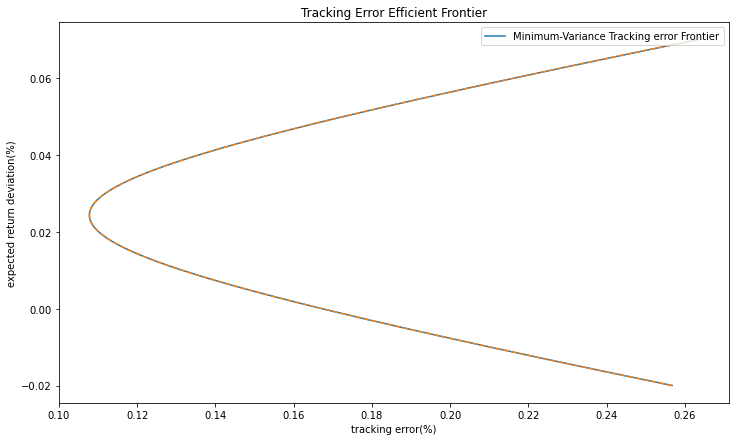

In [39]:
plt.figure(figsize=(12,7))
plt.plot(min_std,limit_var,label='Minimum-Variance Tracking error Frontier')
plt.plot(min_std, limit_var, '--')

plt.xlabel('tracking error(%)')
plt.ylabel('expected return deviation(%)')  
plt.title('Tracking Error Efficient Frontier')
plt.legend(loc = 'upper right')
plt.show()

### Calculate Return of Tangency Portfolio


In [40]:
rtg= (- zeta) / (- alpha)
rtg

0.0415723288111311

In [41]:
sigmatg = -zeta**0.5 / (delta * (- alpha / delta))
sigmatg

0.14092142605568453

In [42]:
### Calculate a & b 
a = (np.dot(zeta * inverseV, e) - np.dot(alpha * inverseV, R)) / (zeta *delta - alpha**2)
a


array([[0.13847964],
       [0.28332039],
       [0.2084869 ],
       [0.12768516],
       [0.24202791]])

In [43]:
b = (np.dot(delta * inverseV, R) - np.dot(alpha * inverseV, e)) / (zeta * delta - alpha**2)
b

array([[ 0.6568212 ],
       [-2.2010107 ],
       [ 1.67344603],
       [-0.30854324],
       [ 0.17928671]])

In [44]:
W = a + b * rtg
W

array([[0.16578523],
       [0.19181925],
       [0.27805595],
       [0.1148583 ],
       [0.24948128]])

In [46]:
Name = ['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other']
Name

['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other']

In [47]:
Weight_table = pd.DataFrame(data = W,columns = ['Weight'])
Weight_table

,Weight
0,0.165785
1,0.191819
2,0.278056
3,0.114858
4,0.249481


In [48]:
Name = ['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other']
Name_table = pd.DataFrame(data = Name,columns = ['Company'])
Name_table
table2=pd.concat([Name_table,Weight_table],axis=1)
table2

,Company,Weight
0,Cnsmr,0.165785
1,Manuf,0.191819
2,HiTec,0.278056
3,Hlth,0.114858
4,Other,0.249481


### Calculate information ratio $ir$

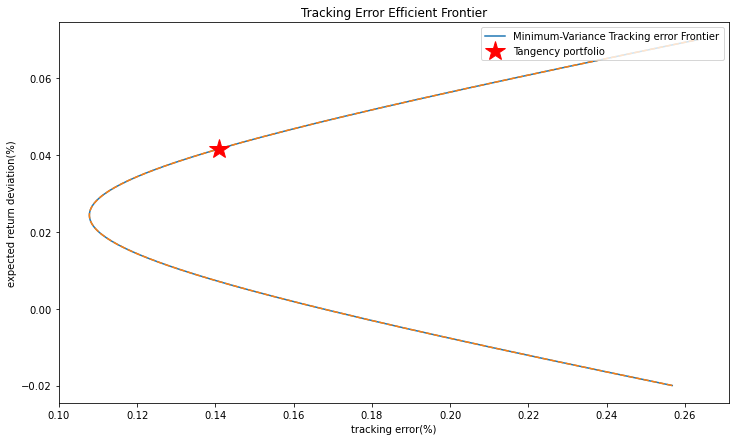

In [45]:

plt.figure(figsize=(12,7))
plt.plot(min_std,limit_var,label='Minimum-Variance Tracking error Frontier')
plt.plot(min_std, limit_var, '--')
plt.plot(sigmatg,rtg,'r*',label='Tangency portfolio',markersize=20)
plt.xlabel('tracking error(%)')
plt.ylabel('expected return deviation(%)')  
plt.title('Tracking Error Efficient Frontier')
plt.legend(loc = 'upper right')
plt.show()


In [49]:
ir = rtg / sigmatg
ir

0.2950036057306428